In [1]:
DATA_DIR = "./BBC/"

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files

In [3]:
data = load_files(DATA_DIR, encoding="latin1") #returns a scikit "bunch", a holder object (accessed like a dict)

In [4]:
#Calculate count of each category 
labels, counts = np.unique(data.target, return_counts=True)
labels, counts

(array([0, 1, 2, 3, 4]), array([510, 386, 417, 511, 401]))

In [5]:
labels_str = np.array(data.target_names)[labels] #convert labels into string labels of subfolders
dataDict = dict(zip(labels_str, counts))
print(dataDict)

{'business': 510, 'entertainment': 386, 'politics': 417, 'sport': 511, 'tech': 401}


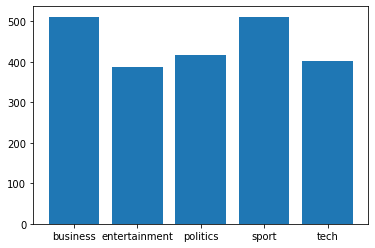

In [6]:
plt.bar(range(len(dataDict)), list(dataDict.values()), align='center')
plt.xticks(range(len(dataDict)), list(dataDict.keys()))
plt.savefig("BBC-distribution.pdf")

In [7]:
#data preparation 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer()
CountMatrix = Vectorizer.fit_transform(data.data) #builds a matrix of feature/indices and their occurence
CountMatrix.shape

(2225, 29421)

In [9]:
from sklearn.model_selection import train_test_split
X_train_vectors, X_test_vectors, y_train_vectors, y_test_vectors = train_test_split(CountMatrix, data.target, train_size=0.80, test_size=0.20, random_state=None)
X_train_vectors.shape

(1780, 29421)

In [10]:
from sklearn.naive_bayes import MultinomialNB
NB_Cls = MultinomialNB()
NB_Cls.fit(X_train_vectors, y_train_vectors)

MultinomialNB()

In [11]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = NB_Cls.predict(X_test_vectors)
print(accuracy_score(y_test_vectors, y_pred))
print(classification_report(y_test_vectors, y_pred))

0.9730337078651685
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       111
           1       0.97      0.97      0.97        74
           2       0.92      1.00      0.96        85
           3       1.00      1.00      1.00        89
           4       0.98      0.98      0.98        86

    accuracy                           0.97       445
   macro avg       0.97      0.98      0.97       445
weighted avg       0.97      0.97      0.97       445

